In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
df1=pd.read_csv(r"C:\Users\OJ 001\Documents\Bookings.csv")
df2=pd.read_csv(r"C:\Users\OJ 001\Documents\Sessions.csv")


In [23]:
df1.columns

Index(['customer_id', 'booking_id', 'from_city', 'from_country', 'to_city',
       'to_country', 'booking_time', 'device_type_used', 'INR_Amount',
       'service_name', 'no_of_passengers', 'days_to_departure', 'distance_km'],
      dtype='object')

In [43]:
df2.columns

Index(['session_id', 'search_id', 'search_time', 'session_starting_time',
       'booking_id'],
      dtype='object')

#1. Find the number of distinct bookings, sessions, and searches from the given data 
sets.

In [46]:
distinct_bookings = df1['booking_id'].nunique()
distinct_sessions = df2['session_id'].nunique()
distinct_searches = df2['search_id'].nunique()
#printing the results 
print("Number of distinct bookings:", distinct_bookings)
print("Number of distinct sessions:", distinct_sessions)
print("Number of distinct searches:", distinct_searches)

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


#2.How many sessions have more than one booking? 

In [50]:
#rows where booking id is not null
booked_sessions = df2[df2['booking_id'].notnull()]

In [52]:
#counting bookings per session 
bookings_per_session = booked_sessions.groupby('session_id')['booking_id'].count()

In [54]:
#sessions with more than one booking 
sessions_with_multiple_bookings = bookings_per_session[bookings_per_session > 1]

In [56]:
#count of the above sessions 
num_sessions = len(sessions_with_multiple_bookings)

In [58]:
#printing result
print("Number of sessions with more than one booking:", num_sessions)

Number of sessions with more than one booking: 35


#3.Which days of the week have the highest number of bookings? Also, draw a pie 
chart to show the distribution for all days of the week?

In [63]:
#convert search time to datetime
df2['search_time'] = pd.to_datetime(df2['search_time'], errors='coerce')


In [65]:
#Filter out rows where booking_id is not null and search_time is valid

booked_sessions = df2[df2['booking_id'].notnull() & df2['search_time'].notnull()].copy()


In [67]:
#Extract weekday names
booked_sessions['day_of_week'] = booked_sessions['search_time'].dt.day_name()


In [69]:
#Count bookings per weekday
bookings_by_day = booked_sessions['day_of_week'].value_counts().sort_index()


In [81]:
#Print the day(s) with highest bookings
most_active_days = bookings_by_day[bookings_by_day == bookings_by_day.max()]
print("Day(s) with the highest number of bookings:")
print(most_active_days)

Day(s) with the highest number of bookings:
day_of_week
Tuesday    35
Name: count, dtype: int64


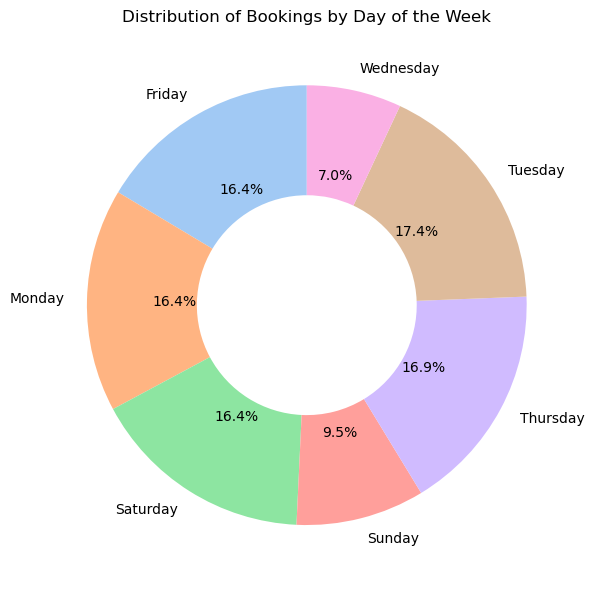

In [83]:
#Drawing the piechart
import seaborn as sns
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:7]
bookings_by_day.plot.pie(autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.5))
plt.ylabel('')
plt.title("Distribution of Bookings by Day of the Week")
plt.tight_layout()
plt.show()

#5For customers who have more than 1 booking, which is the most booked route 
(from_city to to_city)?

In [86]:
#  Count bookings per customer
customer_booking_counts = df1['customer_id'].value_counts()

#  Filter customers with more than 1 booking
multiple_booking_customers = customer_booking_counts[customer_booking_counts > 1].index

# Filter df1 to only include those customers
multi_df = df1[df1['customer_id'].isin(multiple_booking_customers)].copy()

# Create route column (from_city → to_city)
multi_df['route'] = multi_df['from_city'] + " → " + multi_df['to_city']

# Count how many times each route was booked
route_counts = multi_df['route'].value_counts()

# Display the most booked route
most_booked_route = route_counts.idxmax()
most_booked_count = route_counts.max()

print(f"The most booked route among repeat customers is: {most_booked_route} ({most_booked_count} bookings)")


The most booked route among repeat customers is: Gurgaon → Roissy-en-France (5 bookings)


#4.For each of the service names, display the total number of bookings and the total 
Gross Booking Value in INR.

In [91]:
# Group by service_name and calculate count and total INR_Amount
service_summary = df1.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gross_value=('INR_Amount', 'sum')
).reset_index()

# Display the result
print(service_summary)


  service_name  total_bookings  total_gross_value
0      GOIBIBO             186         5897637.97
1          MMT              48          665669.08
2        YATRA             105         3378702.13


#6.Which are the top 3 departure cities from where customers book mostly in advance, 
provided that there have been at least 5 departures from that city?


In [100]:


# Ensure booking_time is in datetime format
df1['booking_time'] = pd.to_datetime(df1['booking_time'], errors='coerce')

# We already have 'days_to_departure' column — use it directly
# Group by from_city to compute:
# - average days_to_departure
# - number of bookings
city_advance_stats = df1.groupby('from_city').agg(
    avg_days_in_advance=('days_to_departure', 'mean'),
    booking_count=('booking_id', 'count')
).reset_index()

# Filter cities with at least 5 bookings
city_advance_stats = city_advance_stats[city_advance_stats['booking_count'] >= 5]

# Get top 3 cities with highest average days booked in advance
top_3_cities = city_advance_stats.sort_values(by='avg_days_in_advance', ascending=False).head(3)

# Display the result
print("Top 3 departure cities where customers book most in advance:")
print(top_3_cities[['from_city', 'avg_days_in_advance', 'booking_count']])


Top 3 departure cities where customers book most in advance:
     from_city  avg_days_in_advance  booking_count
7      Bālāpur            46.166667              6
11  Devanhalli            29.583333             24
8      Chennai            26.187500             16


  #7.Plot a heatmap displaying correlations of the numerical column and report which 
pair of numerical columns in the bookings data set, have the maximum correlation?

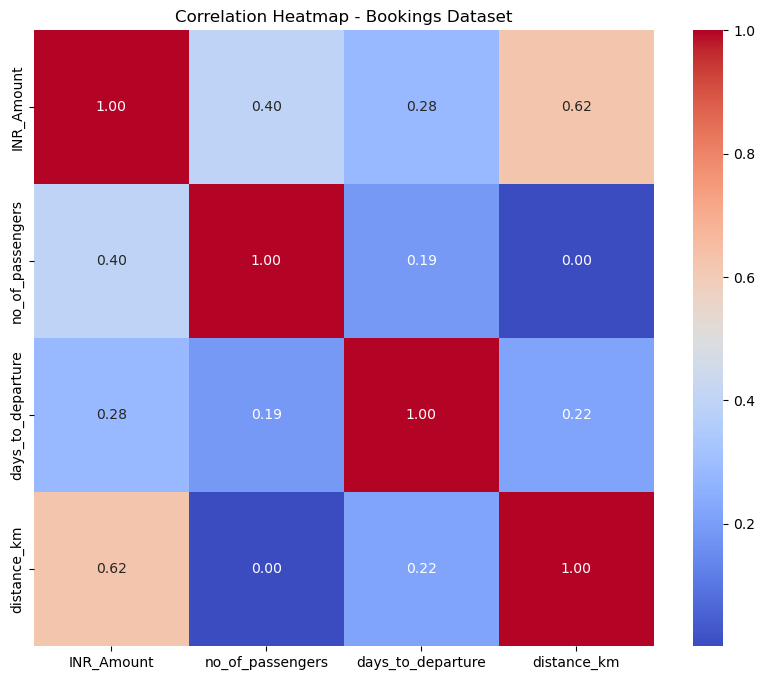

Maximum correlation is between: ('INR_Amount', 'distance_km') with value: 0.62


In [105]:



# Select only numerical columns
numerical_cols = df1.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Bookings Dataset")
plt.show()

# Find the pair with maximum correlation (excluding self-correlation)
corr_unstacked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0],dtype=bool)).unstack()
max_corr_pair = corr_unstacked.abs().sort_values(ascending=False).idxmax()
max_corr_value = corr_unstacked[max_corr_pair]

print(f"Maximum correlation is between: {max_corr_pair} with value: {max_corr_value:.2f}")


#8.For each service, which is the most used device type for making bookings on the 
platform?

In [112]:
# Group by service_name and device_type_used, count the number of bookings
device_usage = df1.groupby(['service_name', 'device_type_used']).size().reset_index(name='count')

# Get the most used device type for each service
most_used_devices = device_usage.sort_values('count', ascending=False).drop_duplicates('service_name')

print(most_used_devices[['service_name', 'device_type_used', 'count']])



  service_name device_type_used  count
2      GOIBIBO              IOS     70
9        YATRA          Desktop     51
5          MMT          Desktop     30


#9.Plot the trends at a quarterly frequency for the number of bookings by each of the 
device types, that is, plot a time series for each year and quarter showing the 
number of bookings performed by each device type.

C:\Users\OJ 001\AppData\Local\Temp\ipykernel_16744\2970475705.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df1['year_quarter'] = df1['booking_time'].dt.to_period('Q').astype(str)


<Figure size 1400x700 with 0 Axes>

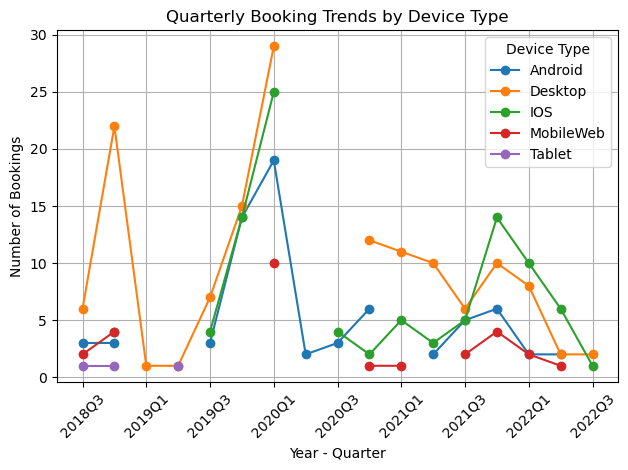

In [115]:

# Convert booking_time to datetime
df1['booking_time'] = pd.to_datetime(df1['booking_time'])

# Create a quarter column
df1['year_quarter'] = df1['booking_time'].dt.to_period('Q').astype(str)

# Group by year_quarter and device_type_used, and count bookings
quarterly_trends = df1.groupby(['year_quarter', 'device_type_used']).size().reset_index(name='booking_count')

# Pivot the data for plotting
pivot_data = quarterly_trends.pivot(index='year_quarter', columns='device_type_used', values='booking_count')

# Plotting
plt.figure(figsize=(14, 7))
pivot_data.plot(marker='o')
plt.title("Quarterly Booking Trends by Device Type")
plt.xlabel("Year - Quarter")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Device Type')
plt.tight_layout()
plt.show()


#10.An example 

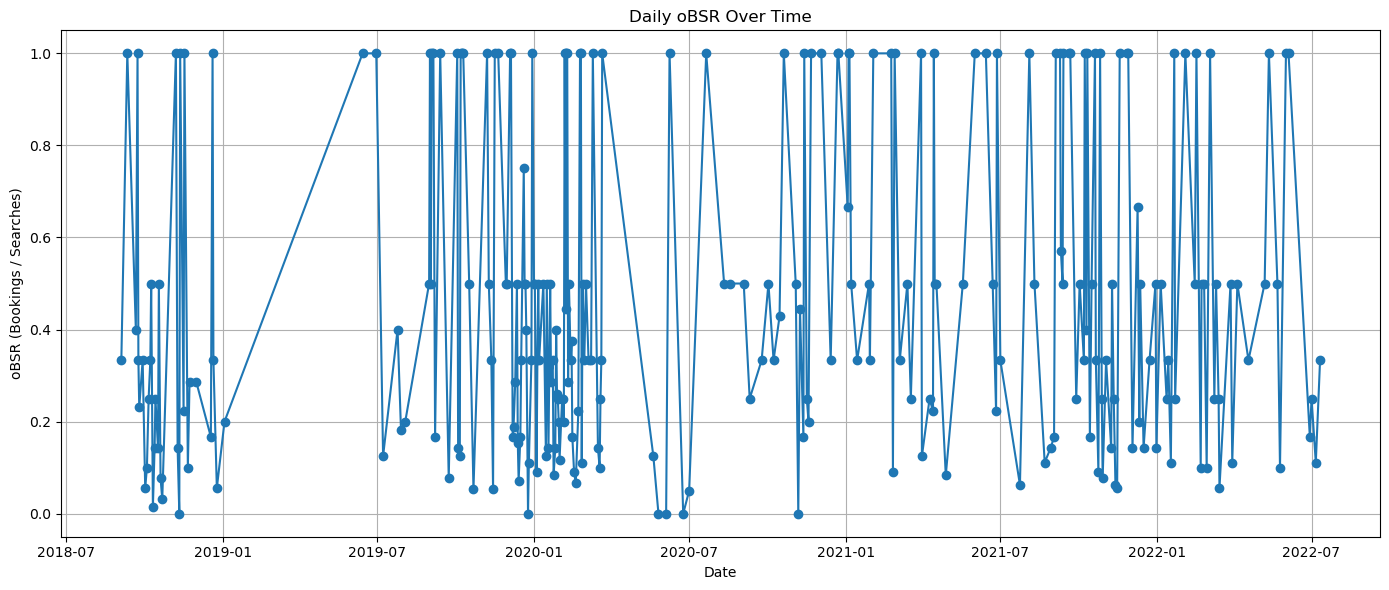

Average oBSR by Month:
month
1     0.384617
2     0.513558
3     0.422279
4     0.423611
5     0.389286
6     0.683761
7     0.284710
8     0.431746
9     0.613300
10    0.435963
11    0.501276
12    0.436079
Name: oBSR, dtype: float64

Average oBSR by Day of Week:
day_of_week
Monday       0.457111
Tuesday      0.553135
Wednesday    0.395871
Thursday     0.471516
Friday       0.430868
Saturday     0.456856
Sunday       0.483129
Name: oBSR, dtype: float64


In [120]:
# Convert date columns to datetime
df1['booking_time'] = pd.to_datetime(df1['booking_time'], format='mixed')
df2['search_time'] = pd.to_datetime(df2['search_time'], format='mixed')

# Extract just the date (without time)
df1['date'] = df1['booking_time'].dt.date
df2['date'] = df2['search_time'].dt.date

# Count bookings and searches per date
daily_bookings = df1.groupby('date').size().reset_index(name='booking_count')
daily_searches = df2.groupby('date').size().reset_index(name='search_count')

# Merge booking and search data
daily_obsr = pd.merge(daily_searches, daily_bookings, on='date', how='left').fillna(0)

# Calculate oBSR = bookings / searches
daily_obsr['oBSR'] = daily_obsr['booking_count'] / daily_obsr['search_count']

# Convert 'date' back to datetime
daily_obsr['date'] = pd.to_datetime(daily_obsr['date'])

# Extract month and weekday
daily_obsr['month'] = daily_obsr['date'].dt.month
daily_obsr['day_of_week'] = daily_obsr['date'].dt.day_name()

# Average oBSR per month
monthly_obsr = daily_obsr.groupby('month')['oBSR'].mean()

# Average oBSR per day of week (in correct order)
weekly_obsr = daily_obsr.groupby('day_of_week')['oBSR'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot oBSR over time
plt.figure(figsize=(14, 6))
plt.plot(daily_obsr['date'], daily_obsr['oBSR'], marker='o', linestyle='-')
plt.title("Daily oBSR Over Time")
plt.xlabel("Date")
plt.ylabel("oBSR (Bookings / Searches)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summaries
print("Average oBSR by Month:")
print(monthly_obsr)

print("\nAverage oBSR by Day of Week:")
print(weekly_obsr)